# Introduction to NetworkX and igraph

NetworkX is a Python package for the creation, manipulation, study of the structure and dynamics of complex networks. Their website: https://networkx.org/ contains details of the major changes to the package, and the intended usage of the tool. 

Igraph is a collection of network analysis tools with the emphasis being on efficiency, portability and ease of use. What is great about igraph is that it is open source and free, plus it supports networks to be built in R, Python, Mathematica and C / C++. This is our recommended package for the creation of large networks that can load much more quickly than NetworkX. To read more about igraph: https://igraph.org/.

## Getting setup

To get setup for this tutorial you will need to pip install the required packages into your environment:

In [7]:
! pip install networkx==2.8.8
! pip install igraph==0.9.8
! pip install matplotlib
# Or from the requirements.txt file 
#! pip install -r requirements.txt

  Using cached manimce-0.1.1.post2-py3-none-any.whl (249 kB)
  Using cached pycairo-1.21.0.tar.gz (340 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached progressbar-2.5-py3-none-any.whl
  Using cached scipy-1.9.3-cp38-cp38-macosx_10_9_x86_64.whl (34.2 MB)
  Using cached rich-6.2.0-py3-none-any.whl (150 kB)
  Using cached pangocairocffi-0.4.0-py3-none-any.whl
  Using cached pangocffi-0.8.0-py3-none-any.whl
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 

## NetworkX basics

NetworkX is one of the originally available graph libraries for Python, and is particularly focussed on being user-friendly and Pythonic in its style. It also natively includes methods for calculating some classic network analysis measures.

To import NetworkX into Python, use:

In [15]:
import networkx as nx
print(f'Current version of NetworkX imported is {nx.__version__}')

Current version of NetworkX imported is 2.8.8


And to create an empty graph aliased g, use:

In [16]:
g = nx.Graph()

Now we need to add nodes to our graph, which can be done using methods of the Graph object belonging to g. There are multiple ways to do this, the simplest being adding one node at a time:

In [17]:
g.add_node("Jeremy")
print(g.nodes)
print(g)

['Jeremy']
Graph with 1 nodes and 0 edges


Alternatively, multiple nodes can be added to the graph at once using:

In [18]:
g.add_nodes_from(["Mark", "Jeremy"])
print(f'{g}. Current nodes in network: {g.nodes}')

Graph with 2 nodes and 0 edges. Current nodes in network: ['Jeremy', 'Mark']


Properties can be added to nodes during creation by passing a node, dictionary tuple to Graph.add_nodes_from, for example:

In [19]:
g.add_nodes_from([(
    "Mark", {"followers": 2100}), 
    ("Jeremy", {"followers": 130}
    )])
    
print(g)

Graph with 2 nodes and 0 edges


To add an edge to the graph, we can use the Graph.add_edge method, and reference the nodes already present in the graph:

In [20]:
g.add_edge("Jeremy", "Mark")
print(g)
print(g.edges)

Graph with 2 nodes and 1 edges
[('Jeremy', 'Mark')]


It is worth noting that in NetworkX, when adding an edge, any nodes specified as part of that edge not already in the graph will be added implicitly.

To confirm that our graph now contains nodes and edges, we may want to plot it, using **matplotlib** and **networkx.draw()**. The with_labels parameter adds the names of the nodes to the plot:

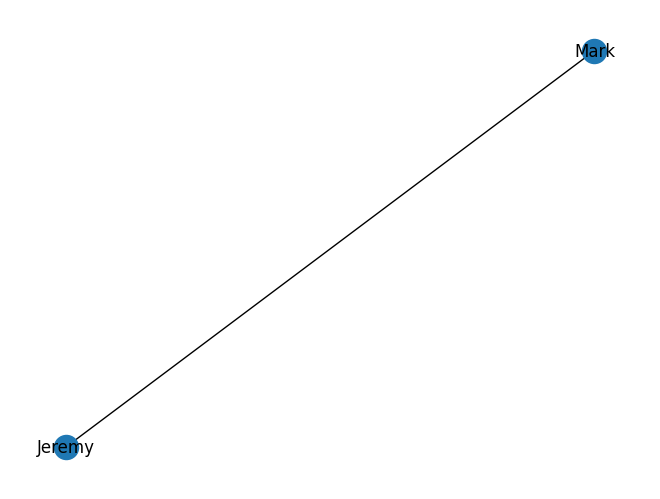

In [21]:
import matplotlib.pyplot as plt
nx.draw(g, with_labels=True)
plt.show()


# igraph basics

NetworkX, while user-friendly, suffers from slow speeds when using larger graphs. This is due to its implementation behind the scenes, written in Python, with some C, C++ and FORTRAN.

In contrast, igraph is implemented in pure C, giving the library an advantage when working with large graphs and complex network algorithms. While not as immediately accessible as NetworkX for beginners, igraph is a useful tool to have under your belt when code efficiency is paramount.

Initially, working with igraph is very similar to working with NetworkX. To import igraph into Python, use:

In [22]:
import igraph as ig
print(f'Current version of igraph imported is: {ig.__version__}')

Current version of igraph imported is: 0.9.8


And to create an empty graph, g, use:

In [24]:
g = ig.Graph()

In contrast to NetworkX, in igraph, all nodes have a prescribed internal integer ID. The first node added has an ID of 0, with all subsequent nodes assigned increasing integer IDs.

Similar to NetworkX, changes can be made to a graph by using methods of a Graph object. Nodes can be added to the graph with the Graph.add_vertices method (note that a vertex is another way to refer to a node). Two nodes can be added to the graph with:

In [25]:
g.add_vertices(2)

IGRAPH U--- 2 0 --


This will add the nodes 0 and 1 to the graph. To name them, we have to assign properties to the nodes. We can do this by accessing the vertices of the Graph object. Similar to how you would access elements of a list, each node’s properties can be accessed by using the notation below. Here we are setting the “name” and “followers” attributes of nodes 0 and 1:

In [26]:
g.vs[0]["name"] = "Jeremy"
g.vs[1]["name"] = "Mark"
g.vs[0]["followers"] = 130
g.vs[1]["followers"] = 2100


Node properties can also be added listwise, where the first list element corresponds to node ID 0, the second node ID 1, and so on. The following two lines are equivalent to the four lines above:

In [27]:
g.vs["name"] = ["Jeremy", "Mark"]
g.vs["followers"] = [130, 2100]

To add an edge, we can use the Graph.add_edges() method:

In [28]:
g.add_edges([(0, 1)])

Here, we are only adding one edge, but additional edges can be added to the list parameter required by add_edges. SAs with NetworkX, if edges are added for nodes that are not currently in the graph, nodes will be created implicitly. However, since igraph requires nodes to have sequential IDs, attempting to add the edge pair (1, 3) to a graph with two vertices, will fail.